In [8]:
'''THis block of code pre processes the data'''
from nltk.stem import WordNetLemmatizer
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()
from nltk.tokenize import word_tokenize,sent_tokenize

import csv
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
file_path = 'Data_mesh_publications.csv'

# Read the TSV file and convert it to a DataFrame
df = pd.read_csv(file_path, delimiter=',')
df

,Filename,Content,Publisher
0,Finding Your Way Through the Jungle of Big Dat...,Abstract—This paper presents a systematic revi...,IEEE
1,Enterprise Data Strategy A Decentralized Data ...,Abstract— As the enterprises experience expone...,IEEE
2,A Semantic Approach to Identifier Management i...,Semantic Approach to Identiﬁer Management inE...,IEEE
3,Towards Automating Federated Data Governance_c...,utomating Federated Data Governance‬‭Arif Wide...,IEEE
4,Breaking Down Data Silos Data Mesh to Achieve ...,Abstract— Data localization laws...,IEEE
5,A novel design for Data Processing Framework o...,novel design for Data Processing Framework of...,IEEE
6,Decentralized Data Governance as Part of a Dat...,Abstract —Data mesh is a socio-technical ...,IEEE
7,Privacy Engineering in the Data Mesh Towards a...,". Privacy engineering, emphasizing data protec...",Springer
8,Data Mesh as Distributed Data Platform for Lar...,. Rapid increase in data volume during the las...,Springer
9,ProMoTe A Data Product Model Template for Data...,. As the shortcomings of monolithic data platf...,Springer


In [35]:
# Load NLTK stop words
nltk.download('wordnet')
nltk.download("stopwords")
nltk_stop_words = set(stopwords.words('english'))
print("Number of stop words from NLTK:", len(nltk_stop_words))

# Load stop words from CSV into a set
csv_file_path = "Data_mesh_stop_words.csv"
try:
    # Load CSV with appropriate encoding
    words_df = pd.read_csv(csv_file_path, header=None, names=["stopword"], encoding="ISO-8859-1")
    custom_stop_words = set(map(str.lower, words_df["stopword"]))
    print("Number of custom stop words from CSV:", len(custom_stop_words))
except Exception as e:
    print(f"Error reading CSV file: {e}")
    custom_stop_words = set()

# Combine stop words from both sources
stop_words = nltk_stop_words.union(custom_stop_words)

# Optional: Verify the combined set
print("Total number of stop words:", len(stop_words))

Number of stop words from NLTK: 179
Number of custom stop words from CSV: 178
Total number of stop words: 357


[nltk_data] Downloading package wordnet to /home/archit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/archit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
words_to_check = ['http', 'com', 'author','license' ]

# Check if each word is in stop_words, and if not, add it
for word in words_to_check:
    if word not in stop_words:
        print(f"Adding '{word}' to stop_words")
        stop_words.add(word)

# Print the updated stop_words set
print("Updated stop words set:", stop_words, len(stop_words))

Updated stop words set: {'condition', 'published', 'one', 'url', 'which', 'few', 'too', 'your', 'now', 'khalil', 'science', 'preprint', 'further', 'approach', 'ma', 'central', 'mf', 'organization', 'haven', 'social', 'zero', 'xxx', 'literature', 'out', 'springer', 'my', 'or', 'each', 'have', 'his', 'project', 'does', 'if', 'and', 'rule', 'october', 'doing', 'is', 'available', 'way', 'while', 't', 'expert', 'shan', 'elsevier', "mightn't", 'http', 'interviewee', "shan't", 'committee', 'worapol', 'lncs', 'will', 'management', 'very', 'll', 'centeris', 'wiley', 'yours', 'enterprise', 'discussion', 'off', "it's", 'she', 'had', 'tjoa\xa0', 'podlesny\xa0', 'scientific', "wouldn't", 'business', "that'll", 'nd', 'do', 'author', 'method', 'hochschule', 'pp', 'february', 'was', 'dmbok', 'computer', 'st', 'than', 'technische', 'governance', 'on', 'case', 'many', 'before', 'background', 'wilfr\xa0', 'internet', 'been', 'hcist', 'di', 'couldn', 'process', 'team', 'sciencedirect', 'hers', 'org', "wer

In [39]:
def clean_text(text):
    
    # Remove HTML tags and non-English characters
    text = re.sub(r"<[^>]+>", "", str(text))
    text = re.sub(r"[^A-Za-zÀ-ž ]", " ", str(text))

    # Tokenize and convert to lowercase
    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    # Remove single characters and numbers
    words_filtered = [word for word in words_tokens_lower if len(word) > 1 and not word.isnumeric()]

    # Remove stop words
    words_filtered = [word for word in words_filtered if word not in stop_words]

    # Lemmatize words
    words_lemmatized = [lemmatizer.lemmatize(word) for word in words_filtered]

    # Join the words back into a string
    text_clean = " ".join(words_lemmatized)
    return text_clean


In [56]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/archit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [58]:
pdf_data = df.dropna(axis = 0, how = 'any', inplace = False)
    
# pdf_data = df.copy()
# drop_nan(pdf_data)
pdf_data['Content'] = pdf_data['Content'].apply(clean_text)


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/home/archit/nltk_data'
    - '/home/archit/anaconda3/nltk_data'
    - '/home/archit/anaconda3/share/nltk_data'
    - '/home/archit/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/home/archit/nltk_data'
**********************************************************************


In [60]:
pdf_data

,Filename,Content,Publisher
0,Finding Your Way Through the Jungle of Big Dat...,Abstract—This paper presents a systematic revi...,IEEE
1,Enterprise Data Strategy A Decentralized Data ...,Abstract— As the enterprises experience expone...,IEEE
2,A Semantic Approach to Identifier Management i...,Semantic Approach to Identiﬁer Management inE...,IEEE
3,Towards Automating Federated Data Governance_c...,utomating Federated Data Governance‬‭Arif Wide...,IEEE
4,Breaking Down Data Silos Data Mesh to Achieve ...,Abstract— Data localization laws...,IEEE
5,A novel design for Data Processing Framework o...,novel design for Data Processing Framework of...,IEEE
6,Decentralized Data Governance as Part of a Dat...,Abstract —Data mesh is a socio-technical ...,IEEE
7,Privacy Engineering in the Data Mesh Towards a...,". Privacy engineering, emphasizing data protec...",Springer
8,Data Mesh as Distributed Data Platform for Lar...,. Rapid increase in data volume during the las...,Springer
9,ProMoTe A Data Product Model Template for Data...,. As the shortcomings of monolithic data platf...,Springer


In [63]:
df_subset = pdf_data[['Filename','Publisher','Year','Publication_type']]
df_subset_sorted = df_subset.sort_values(by='Year', ascending=True)
df_subset_sorted
print(df_subset_sorted.to_latex(index=False))

KeyError: "['Year', 'Publication_type'] not in index"

In [ ]:
# Assuming 'pdf_content' column contains the cleaned text
text_combined = ' '.join(pdf_data['Content'])

# Tokenize the text
tokens = word_tokenize(text_combined)

# Count the frequency of each word
word_freq = nltk.FreqDist(tokens)

# Create a DataFrame from the frequency distribution
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)
word_freq_df.head(20)

In [ ]:
word_freq_df.head(21)

In [ ]:
word_freq_df = word_freq_df[word_freq_df['Word'] != 'data']

In [ ]:
# Plot the top N words by frequency in a bar chart
plt.figure(figsize=(8, 3))

# Choose a Seaborn color palette (e.g., 'flare')
original_palette = sns.color_palette('crest', n_colors=50)

# Invert the color palette
# inverted_palette = sns.color_palette('crest', n_colors=50)[::-1]

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Manually add the title as text inside the plot
plt.text(0.7, 0.8, 'Top 20 words by individual frequency \n [excluding "data" (208,816 times)]', horizontalalignment='center', fontsize=16, transform=plt.gca().transAxes)

sns.barplot(x='Word', y='Frequency', data=word_freq_df.head(20), palette=original_palette, hue = 'Word')
# plt.title('Top 20 words by individual frequency \n [excluding "data"(208,816 times)]')
plt.ylabel('Frequency')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')

# plt.savefig('word_occurrence.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
pdf_data

In [70]:
csv_filename = 'Data_mesh_publications_cleaned.csv'

# Save the DataFrame to a CSV file
pdf_data.to_csv(csv_filename, index=False)

In [71]:
# contains_artificial = pdf_data.applymap(lambda x: 'artificial' in str(x).lower()).any().any()

# print(contains_artificial)

In [75]:
import numpy as np
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.colors as mcolors
import matplotlib.cm as cm

In [76]:
cv = CountVectorizer(ngram_range=(1,1), stop_words='english', max_features=21)
counts_matrix = cv.fit_transform(pdf_data['Content'])

In [77]:
counts_matrix.shape

(52, 21)

In [79]:
counts_matrix.shape

(52, 21)

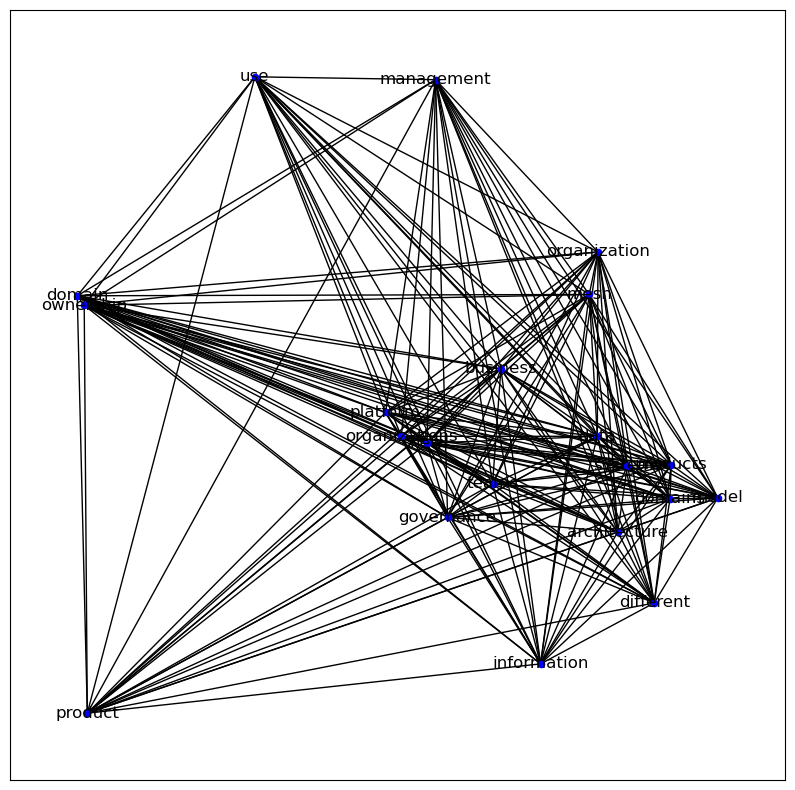

In [80]:
# Get feature names (words)
words = cv.get_feature_names_out()

# Create co-occurrence matrix
co_occurrences = (counts_matrix.T * counts_matrix) 
co_occurrences.setdiag(0) # fill same word cooccurence to 0

# Create co-occurrence DataFrame
co_occurrences_df = pd.DataFrame(co_occurrences.todense(), index=words, columns=words)

# Create graph from the co-occurrence dataframe
G = nx.from_pandas_adjacency(co_occurrences_df)

# You may draw this graph using Networkx draw function or visualize using Gephi by exporting
# nx.write_gexf(G, 'co_occurrences.gexf')

# Draw the network
plt.figure(figsize=(10,10))
nx.draw_networkx(G, with_labels=True, node_size=20, node_color='blue')
plt.show()

# plt.savefig('word_co-occurrence.pdf', format='pdf')

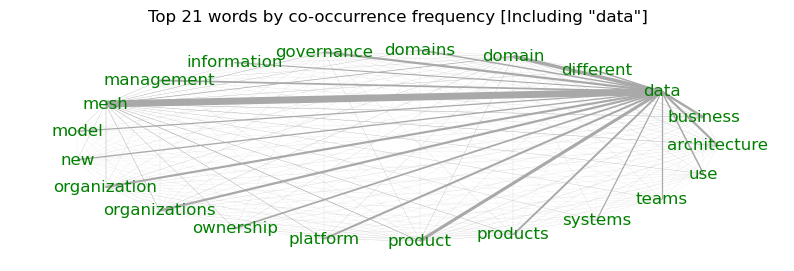

In [81]:
# Get feature names (words)
words = cv.get_feature_names_out()

# Create co-occurrence matrix
co_occurrences = (counts_matrix.T * counts_matrix) 
co_occurrences.setdiag(0) # fill same word cooccurence to 0

# Create co-occurrence DataFrame
co_occurrences_df = pd.DataFrame(co_occurrences.todense(), index=words, columns=words)

# Create graph from the co-occurrence dataframe
G = nx.from_pandas_adjacency(co_occurrences_df)

for (u, v, wt) in G.edges.data('weight'):
    if wt is None:
        G[u][v]['weight'] = co_occurrences_df[u][v]

# Get edge weights for a list
weights = [G[u][v]['weight'] for u,v in G.edges]

# Normalize weights to range 0 to 1 for better visuals
weights = np.array(weights)
weights = (weights / weights.max()) * 5

# Set figure size for the plot
plt.figure(figsize=(10, 3))
plt.title('Top 21 words by co-occurrence frequency [Including "data"]', fontsize = 12)

# Draw nodes
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='white', node_size=0)

# Draw edges with thickness representing the weight
nx.draw_networkx_edges(G, pos, width=weights, edge_color='darkgrey')

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=12, font_color='green')

# Remove the spines (boundary) around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.savefig('word_co-occurrence.pdf', format='pdf', bbox_inches='tight')
plt.show()


In [82]:
co_occurrences_df

,architecture,business,data,different,domain,domains,governance,information,management,mesh,...,new,organization,organizations,ownership,platform,product,products,systems,teams,use
architecture,0,36770361,523047857,22110824,51919728,22254008,30633836,15160199,25855716,98364773,...,19187839,31720619,34058810,25071696,26440736,41535208,24742988,17075022,17181537,20285933
business,36770361,0,574217793,27526097,60604023,24459917,29455417,20333240,29981928,105618511,...,25640693,34354764,39626476,24456524,21893428,40082758,22284007,21618454,17009777,21875414
data,523047857,574217793,0,350582800,829613657,344277709,528059756,251694091,406909682,1639892657,...,306137116,509996803,531656439,401060381,485946190,730745755,449162647,285715051,295309048,358188978
different,22110824,27526097,350582800,0,40428060,15804757,17469306,12580472,19096091,68510914,...,15679079,21970474,26109600,15160746,14593415,26418117,14605001,14244981,11133963,13622265
domain,51919728,60604023,829613657,40428060,0,37490552,44633518,25528742,43817428,164838722,...,33537447,52289215,58724486,38915380,41831463,67953333,39707682,30967784,28178507,32157163
domains,22254008,24459917,344277709,15804757,37490552,0,19115590,9387950,18367895,66916452,...,13032832,22219102,24617713,17502893,16730663,27468292,16500532,11710620,11715953,12426807
governance,30633836,29455417,528059756,17469306,44633518,19115590,0,13811575,22035249,101297914,...,15176482,30628717,28162622,25483612,37237829,51256296,32773235,15880040,19949376,24283620
information,15160199,20333240,251694091,12580472,25528742,9387950,13811575,0,12329158,45284736,...,11806504,14344269,16489867,8718770,8876052,18802050,10423678,11446998,7614980,11786193
management,25855716,29981928,406909682,19096091,43817428,18367895,22035249,12329158,0,77817653,...,16155322,25595356,28592366,19587255,19188037,31468087,18445849,14409830,13607340,15229519
mesh,98364773,105618511,1639892657,68510914,164838722,66916452,101297914,45284736,77817653,0,...,56838140,98535976,102740258,77409824,102050255,147073237,90879813,54045522,58303087,68144302


In [84]:
# Get all edges data along with the nodes
edges_data = [(u, v, data) for u, v, data in G.edges(data=True)]

# Create a DataFrame from the edges data
edges_df = pd.DataFrame(edges_data, columns=['word1', 'word2', 'data'])

# Extract the weight into a separate column
edges_df['weight'] = edges_df['data'].map(lambda x: x['weight'])

# Drop the 'data' column as it is not needed anymore
edges_df = edges_df.drop('data', axis=1)

# Sort the DataFrame based on 'weight' in descending order
edges_df = edges_df.sort_values(by='weight', ascending=False)

# Get the top 10 edges
top_10_edges = edges_df.head(5)

print(top_10_edges, '\n')
print(top_10_edges.to_latex(index=False))

       word1          word2      weight
45      data           mesh  1639892657
40      data         domain   829613657
52      data        product   730745755
20  business           data   574217793
49      data  organizations   531656439 

\begin{tabular}{llr}
\toprule
word1 & word2 & weight \\
\midrule
data & mesh & 1639892657 \\
data & domain & 829613657 \\
data & product & 730745755 \\
business & data & 574217793 \\
data & organizations & 531656439 \\
\bottomrule
\end{tabular}



In [85]:
# Compute min and max of the 'weight' column
min_weight = edges_df['weight'].min()
max_weight = edges_df['weight'].max()

# Compute normalized weights, (value - min) / (max - min)
edges_df['normalized_weight'] = (edges_df['weight'] - min_weight) / (max_weight - min_weight)

# Get the top 10 edges with normalized weights
top_10_edges_normalized = edges_df.sort_values(by='normalized_weight', ascending=False).head(10)

print(top_10_edges_normalized)

           word1          word2      weight  normalized_weight
45          data           mesh  1639892657           1.000000
40          data         domain   829613657           0.503590
52          data        product   730745755           0.443019
20      business           data   574217793           0.347124
49          data  organizations   531656439           0.321049
42          data     governance   528059756           0.318846
1   architecture           data   523047857           0.315775
48          data   organization   509996803           0.307780
51          data       platform   485946190           0.293045
53          data       products   449162647           0.270510


In [86]:
counts_matrix

<52x21 sparse matrix of type '<class 'numpy.int64'>'
	with 991 stored elements in Compressed Sparse Row format>

In [87]:
# Convert sparse matrix to dense matrix
dense_matrix = counts_matrix.todense()

# Convert dense matrix to DataFrame and assign feature names (words) as index and columns
df1 = pd.DataFrame(dense_matrix, index=words, columns=words)

# Reset index of the data frame to flatten it to a long format
df2 = df1.stack().reset_index()

# Rename the columns
df2.columns = ['word1', 'word2', 'co_occurrence']

# Remove row where both words are the same because these are not valid pairs
df2 = df2[df2['word1'] != df2['word2']]

# Get the top 5 most co-occurring word pairs
top_5_pairs = df2.sort_values(by='co_occurrence', ascending=False).head(20)

print(top_5_pairs)

ValueError: Shape of passed values is (52, 21), indices imply (21, 21)